In [1]:
# Load the network
from PATCHUNET import *
import torch

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

netD = PatchUNET()
netD = netD.to(device)

from torchsummary import summary
summary(netD,(1,48*48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         295,040
               ELU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
               ELU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 32]           2,080
               ELU-6                [-1, 1, 32]               0
            Linear-7                [-1, 1, 16]             528
               ELU-8                [-1, 1, 16]               0
            Linear-9                 [-1, 1, 8]             136
              ELU-10                 [-1, 1, 8]               0
           Linear-11                 [-1, 1, 4]              36
              ELU-12                 [-1, 1, 4]               0
           Linear-13                 [-1, 1, 4]              20
              ELU-14                 [-

In [2]:
# Train the network
import numpy as np
import h5py
from Utils import *
from PATCHUNET import *

#Load the data
f = h5py.File('./field_example.mat', 'r')
dn= f.get('DataNoisy')
dn = dn / np.max(np.abs(dn))

dn = np.array(dn).T

epoch = 50
batch_size = 128
outB = Train(netD,dn,epoch,batch_size)

Saving Model
Iter = 0 -- Loss = 2.48623
Saving Model
Iter = 1 -- Loss = 1.45776
Saving Model
Iter = 2 -- Loss = 1.20875
Saving Model
Iter = 3 -- Loss = 1.11882
Saving Model
Iter = 4 -- Loss = 1.07045
Saving Model
Iter = 5 -- Loss = 1.04988
Saving Model
Iter = 6 -- Loss = 1.03933
Saving Model
Iter = 7 -- Loss = 1.03871
Saving Model
Iter = 8 -- Loss = 1.02519
Saving Model
Iter = 9 -- Loss = 1.0185
Saving Model
Iter = 10 -- Loss = 1.01247
Saving Model
Iter = 11 -- Loss = 1.0106
Saving Model
Iter = 12 -- Loss = 1.00748
Saving Model
Iter = 13 -- Loss = 1.00729
Saving Model
Iter = 14 -- Loss = 0.99611
Saving Model
Iter = 18 -- Loss = 0.98833
Saving Model
Iter = 20 -- Loss = 0.98683
Saving Model
Iter = 24 -- Loss = 0.98675
Saving Model
Iter = 26 -- Loss = 0.97942
Saving Model
Iter = 30 -- Loss = 0.97811
Saving Model
Iter = 31 -- Loss = 0.97782
Saving Model
Iter = 32 -- Loss = 0.97591
Saving Model
Iter = 34 -- Loss = 0.97355
Saving Model
Iter = 36 -- Loss = 0.97307
Saving Model
Iter = 37 -- Lo

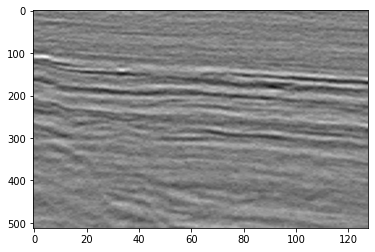

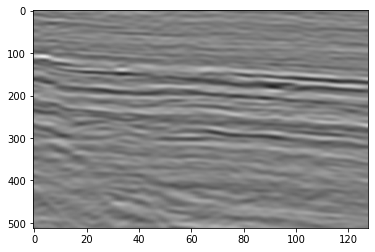

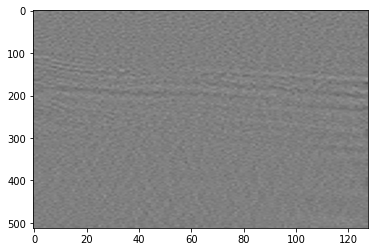

In [3]:
from matplotlib import pyplot as plt
plt.imshow(dn,aspect='auto',cmap='gray', vmin=-1, vmax=1 )
plt.figure()
plt.imshow(outB,aspect='auto',cmap='gray', vmin=-1, vmax=1 )
plt.figure()
plt.imshow(dn-outB,aspect='auto',cmap='gray', vmin=-1, vmax=1 )